In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

filepath="../data_raw/Expenditure_by_total_exp.csv"
data=pd.read_csv(filepath)
data.head()


,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,Not applicable,Not applicable,Percent,18.39787
1,Afghanistan,2013,Not applicable,Not applicable,Percent,18.46120
2,Afghanistan,2012,Not applicable,Not applicable,Percent,12.82317
3,Afghanistan,2011,Not applicable,Not applicable,Percent,19.10585
4,Afghanistan,2010,Not applicable,Not applicable,Percent,22.24014


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reference Area        1805 non-null   object 
 1   Time Period           1805 non-null   int64  
 2   Sex                   1805 non-null   object 
 3   Age group             1805 non-null   object 
 4   Units of measurement  1805 non-null   object 
 5   Observation Value     1805 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 84.7+ KB


In [17]:
data.columns=data.columns.str.strip().str.lower().str.replace(" ","_")
data = data.drop_duplicates()


In [18]:
data["reference_area"].unique()[:10]  # show first 10 country names


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria'], dtype=object)

In [19]:
data=data.dropna(subset=["observation_value"])
data=data.drop_duplicates()

In [20]:
clean_path = "../data_clean/educationexp_by_totalexp_clean.csv"
data.to_csv(clean_path, index=False)
print(f" Cleaned data saved to: {clean_path}")


 Cleaned data saved to: ../data_clean/educationexp_by_totalexp_clean.csv


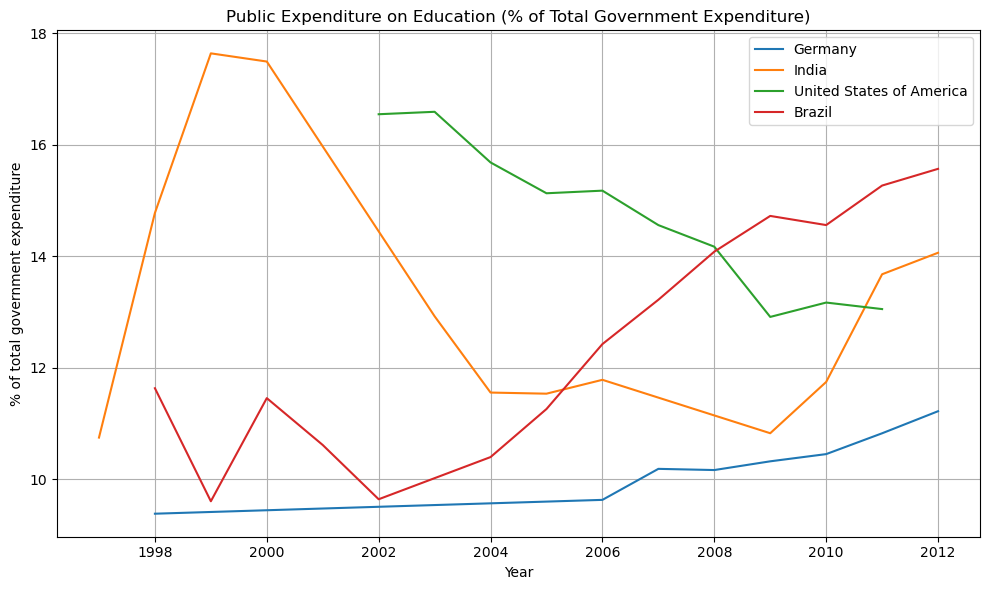

In [21]:
countries = ["Germany", "India", "United States of America", "Brazil"]

plt.figure(figsize=(10,6))
for c in countries:
    subset = data[data["reference_area"] == c]
    plt.plot(subset["time_period"], subset["observation_value"], label=c)

plt.title("Public Expenditure on Education (% of Total Government Expenditure)")
plt.xlabel("Year")
plt.ylabel("% of total government expenditure")
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.show()


In [25]:
data1=pd.read_csv("../data_clean/life_expectancy_both_clean.csv " )

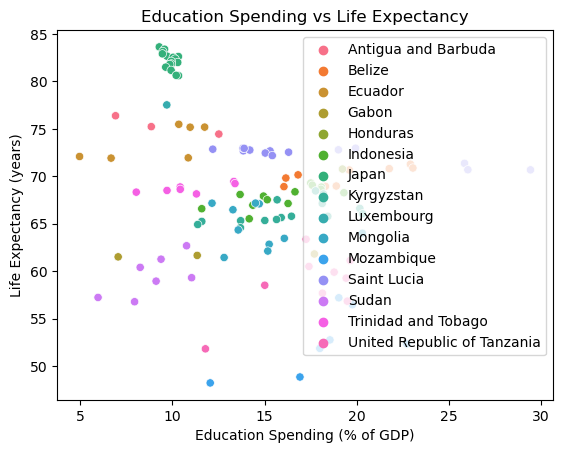

In [39]:
import random
merged_df = pd.merge(data, data1, left_on=["reference_area", "time_period"],right_on=["Country", "Year"], how="inner")
random_countries=random.sample(list(merged_df["reference_area"].unique()),15)
subset=merged_df[merged_df["reference_area"].isin(random_countries)]
sns.scatterplot(data=subset, x="observation_value", y="LifeExpectancy", hue="reference_area")
plt.title("Education Spending vs Life Expectancy")
plt.xlabel("Education Spending (% of GDP)")
plt.ylabel("Life Expectancy (years)")
plt.legend()
plt.show()


In [ ]:
mean_values = (
    data.groupby("reference_area")["observation_value"]
    .mean()
    .sort_values(ascending=False)
)
print(mean_values.head(10))


reference_area
Vanuatu     29.332648
Lesotho     26.228591
Tunisia     25.477926
Yemen       24.433257
Kenya       24.368627
Botswana    24.269573
Ghana       23.522288
Ethiopia    23.428243
Djibouti    23.248168
Namibia     22.847150
Name: observation_value, dtype: float64
